In [1]:
from imports import *


In [66]:
def main(base_folder, local_path, *args, **kwargs):
    bk.load.current_session_linux(base_folder, local_path)
    neurons, metadata = bk.load.spikes()
    states = bk.load.states(True)
    theta = bk.load.intervals('BLA_REM_theta_bouts')
    theta_off = states['REM'].set_diff(theta)

    phasic_tonic = bk.load.intervals('phasic_tonic')

    all_intervals = {'theta': theta,
                     'theta_off': theta_off,
                     'phREM': phasic_tonic['phREM'],
                     'toREM': phasic_tonic['toREM']}

    fr_states = pd.DataFrame()
    for s, intervals in all_intervals.items():
        fr = []
        for n in neurons:
            fr.append(len(n.restrict(intervals)) /
                      intervals.tot_length(time_units='s'))
        fr_states[s] = fr
    return fr_states, metadata


In [67]:
batch_data, batch_metadata = bk.load.batch(main)


100%|██████████| 61/61 [02:08<00:00,  2.10s/it]

Batch finished in 128.18933653831482
Some session were not processed correctly
['Rat08-20130718', 'Rat08-20130719', 'Rat08-20130720', 'Rat08-20130722', 'Rat09-20140324', 'Rat09-20140325', 'Rat09-20140326', 'Rat09-20140327', 'Rat09-20140328', 'Rat09-20140329', 'Rat09-20140331', 'Rat09-20140401', 'Rat09-20140402', 'Rat09-20140403', 'Rat09-20140404', 'Rat09-20140405', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat10-20140705', 'Rat10-20140707', 'Rat10-20140708', 'Rat11-20150310', 'Rat11-20150312', 'Rat11-20150313', 'Rat11-20150314', 'Rat11-20150315', 'Rat11-20150316', 'Rat11-20150317', 'Rat11-20150401', 'Rat11-20150402', 'Rat11-20150403']
52.459016393442624 %


In [68]:
df = pd.DataFrame()
metadata = pd.DataFrame()
for sess, b in batch_data.items():
    df = pd.concat((df, b[0]))
    metadata = pd.concat((metadata, b[1]))

[]

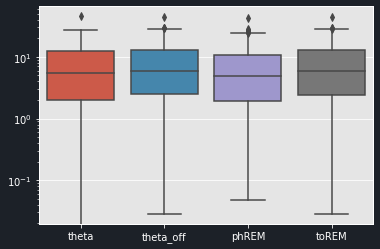

In [111]:
sns.boxplot(data=df[(metadata.Region == 'BLA') & (metadata.Type == 'Int')])
plt.semilogy()

In [110]:
df_hpc = df[(metadata.Region == 'BLA') & (metadata.Type == 'Int')]
np.mean(df_hpc['toREM'])

8.716449524620824

In [105]:
df_hpc = df[(metadata.Region == 'BLA') & (metadata.Type == 'Pyr')]
scipy.stats.ttest_rel(df_hpc['toREM'],df_hpc['phREM'])

Ttest_relResult(statistic=3.952853556902941, pvalue=8.161517192058702e-05)

In [96]:
long = df[(metadata.Region == 'BLA') & (metadata.Type == 'Pyr')].melt()

In [97]:
long

,variable,value
0,theta,0.277270
1,theta,0.489301
2,theta,0.130480
3,theta,0.521921
4,theta,0.358820
...,...,...
4927,toREM,0.964467
4928,toREM,0.673620
4929,toREM,0.629164
4930,toREM,0.250912


In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [99]:
m_comp = pairwise_tukeyhsd(long['value'], long['variable'], alpha=0.05)
m_comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
phREM,theta,0.0646,0.4937,-0.0532,0.1823,False
phREM,theta_off,0.1116,0.0708,-0.0062,0.2294,False
phREM,toREM,0.1105,0.0752,-0.0073,0.2282,False
theta,theta_off,0.047,0.7343,-0.0708,0.1648,False
theta,toREM,0.0459,0.7485,-0.0719,0.1637,False
theta_off,toREM,-0.0011,1.0,-0.1189,0.1167,False


In [101]:
scipy.stats.ttest_ind(long['value'][long['variable']=='toREM'],long['value'][long['variable']=='phREM'])

Ttest_indResult(statistic=2.2776684704642602, pvalue=0.02283164615003366)

[]

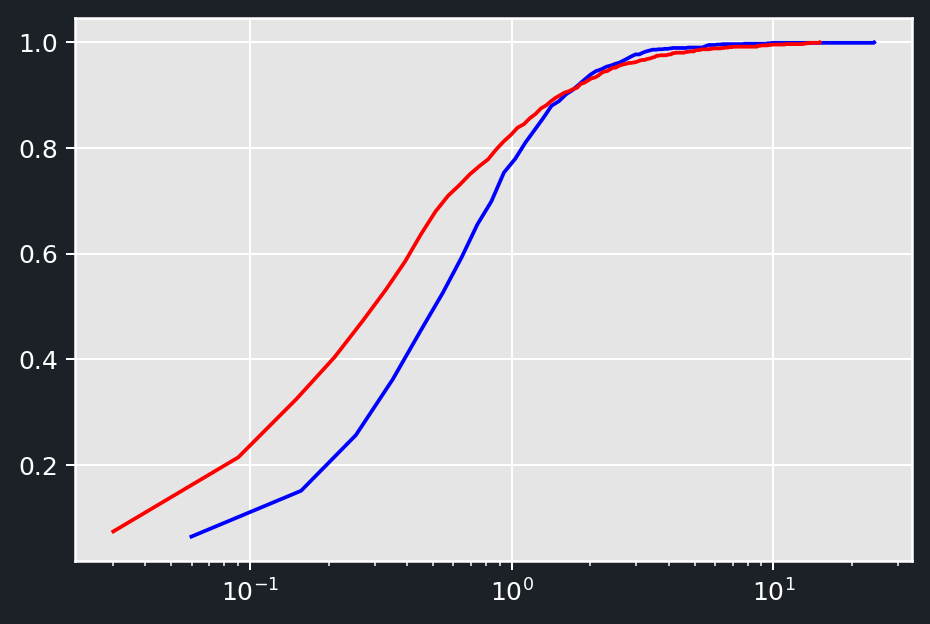

In [94]:
fig, ax = plt.subplots(dpi=180)
bk.plot.cumsum_curves(df[(metadata.Region == 'BLA') & (
    metadata.Type == 'Pyr')]['toREM'], 250, 'blue', ax=ax)
bk.plot.cumsum_curves(df[(metadata.Region == 'BLA') & (
    metadata.Type == 'Pyr')]['phREM'], 250, 'red', ax=ax)
plt.semilogx()


In [50]:
scipy.stats.ttest_rel(df[(metadata.Region == 'BLA') & (metadata.Type == 'Pyr')]['toREM'], df[(
    metadata.Region == 'BLA') & (metadata.Type == 'Pyr')]['phREM'])


Ttest_relResult(statistic=3.952853556902941, pvalue=8.161517192058702e-05)

In [ ]:
bk.compute.bin_by_intervals()
